# New York City Tax Fare Prediction
**Raymond Chen**

**January 25, 2019**

## Background



Tourists travel in an unfamiliar city may have a taxi ride, but sometimes they don't know reasonable taxi fare in this city. Few wicked taxi drivers may charge unreasonable fare by sneakily taking long route or adding initial charge.
If tourists have a tool to predict reasonable taxi fare based on some simple features like time, pickup location or dropoff location, they can notice unusual charge, take some actions and prevent from fraud. tourists make their budget on travel expense conveniently. 

For personal reason, when I have a business trip and have to make a budget in advance, I would use this tool to plan my means of transport. If I have sufficient budget, I can take a taxi for a more comfortable trip. Otherwise, maybe I need to take a train or a bus.

This type of problem is so-called regression problem that demands to predict one continuous target value (e.g. taxi fare) using a set of features. There are many academic research addresses on it : For example, long term travel time is predicted from time, wind speed, temperature ,... etc. features using several state of the art regression methods [[1]](https://www.researchgate.net/publication/230819938_Comparing_state-of-the-art_regression_methods_for_long_term_travel_time_prediction/download), Internet slangs for sentiment score is predicted [[2]](https://www.researchgate.net/publication/283318703_Detection_and_Scoring_of_Internet_Slangs_for_Sentiment_Analysis_Using_SentiWordNet), and sentiment score is predicted using Tweets’ messages [[3]](https://www.researchgate.net/deref/http%3A%2F%2Faclweb.org%2Fanthology%2F%2FS%2FS13%2FS13-2053.pdf).

## Problem Statement
Our target is to predict taxi fare in New York city, and we have several features like pickup GPS location, dropoff GPS location, or number of passengers, etc. to help us build a model to predict. This is a regression problem and we can express it as:

𝑦 = 𝑓(𝑥0,𝑥1,𝑥2,...)

where 𝑦 is taxi fare for a ride, 𝑥0, 𝑥1, ... are features like time, GPS location, etc. of this ride, and 𝑓 is a function or model we want to derive.

Given a dataset with many samples having ground truth taxi fare and features, we can apply different machine learning algorithms or even deep neural network to train a model based on them, i.e. finding some set of parameters that can describe the model mathematically. After model is developed, we can predict taxi fare for a given features.

After model is developed, we can evaluate the model performance using certain metric that can describe the value difference between predicted taxi fare 𝑦 and ground truth taxi fare 𝑦. coefficient of determination (R^2) is used as our evaluation metric in this project.

## Datasets and Inputs
In this project, [New York City Taxi Fare Prediction dataset](https://www.kaggle.com/c/new-york-city-taxi-fare-prediction#description) provided in Kaggle is used.

### File description
- train.csv - Input features and target fare_amount values for the training set (about 55M rows).
- test.csv - Input features for the test set (about 10K rows). Our goal is to predict fare_amount for each row.
- sample_submission.csv - a sample submission file in the correct format (columns key and fare_amount). This file 'predicts' fare_amount to be $11.35 for all rows, which is the mean fare_amount from the training set.

### Data fields 

#### Input (features, X)
- key - Unique string identifying each row in both the training and test sets. 
- pickup_datetime - timestamp value indicating when the taxi ride started.
- pickup_longitude - float for longitude coordinate of where the taxi ride started. 
- pickup_latitude - float for latitude coordinate of where the taxi ride started.
- dropoff_longitude - float for longitude coordinate of where the taxi ride ended. 
- dropoff_latitude - float for latitude coordinate of where the taxi ride ended.
- passenger_count - integer indicating the number of passengers in the taxi ride.

#### Output (target, y)
- fare_amout - float dollar amount of the cost of the taxi ride. This value is only in the training set

# PART A. Explore Data Analysis (EDA)

## 0. Import necessary modules

In [1]:
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy
import seaborn as sns
%matplotlib inline

## 1. Load Data

Use 200K data to explore data

In [2]:
n_samples = 200000
df=pd.read_csv('all/train.csv', nrows = n_samples)
display(df.head())
df.info()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
key                  200000 non-null object
fare_amount          200000 non-null float64
pickup_datetime      200000 non-null object
pickup_longitude     200000 non-null float64
pickup_latitude      200000 non-null float64
dropoff_longitude    199999 non-null float64
dropoff_latitude     199999 non-null float64
passenger_count      200000 non-null int64
dtypes: float64(5), int64(1), object(2)
memory usage: 12.2+ MB


In [3]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,11.342877,-72.506121,39.922326,-72.518673,39.925579,1.682445
std,9.837855,11.608097,10.048947,10.724226,6.751120,1.306730
min,-44.900000,-736.550000,-3116.285383,-1251.195890,-1189.615440,0.000000
25%,6.000000,-73.992050,40.735007,-73.991295,40.734092,1.000000
50%,8.500000,-73.981743,40.752761,-73.980072,40.753225,1.000000
75%,12.500000,-73.967068,40.767127,-73.963508,40.768070,2.000000
max,500.000000,2140.601160,1703.092772,40.851027,404.616667,6.000000


/Users/RAYMOND/miniconda3/envs/ml-capstone/lib/python3.5/site-packages/numpy/lib/histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/RAYMOND/miniconda3/envs/ml-capstone/lib/python3.5/site-packages/numpy/lib/histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


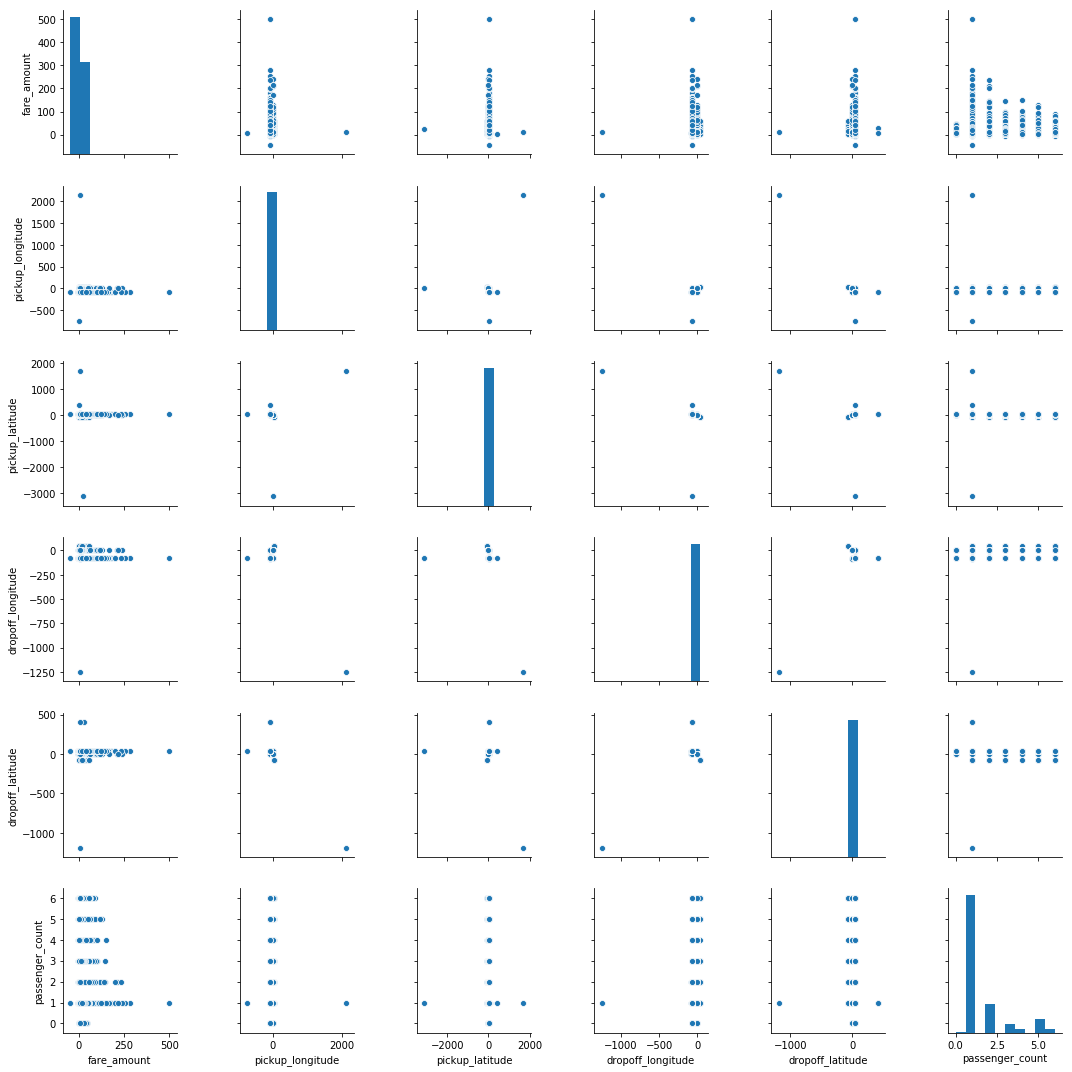

In [4]:
def show_pairplot(df):
    sns.pairplot(df[df.columns], height=2.5)
    plt.tight_layout()
    plt.show()
    
show_pairplot(df)

## 2. Remove N.A. and outliers

### 2-1. Remove N.A.

In [5]:
def check_total_samples(df):
    print('Total number of samples = ', len(df))
    
def check_na(df):
    print(df.isnull().sum())
    
def remove_na(df):
    df = df.dropna(how = 'any', axis = 'rows')
    return df

In [6]:
check_total_samples(df)
check_na(df)
df = remove_na(df)
check_total_samples(df)

Total number of samples =  200000
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64
Total number of samples =  199999


### 2-2. Remove GPS outliers

Note that GPS location (latitude/longitude) should be within New York city. I use [google map](https://goo.gl/maps/AMDNdfcBVvx) to manually find out the boundary of latitude and longitude and implement GPS outliers removal in the following remove_GPS_outliers() function.

Total number of samples =  199999
Total number of samples =  195568


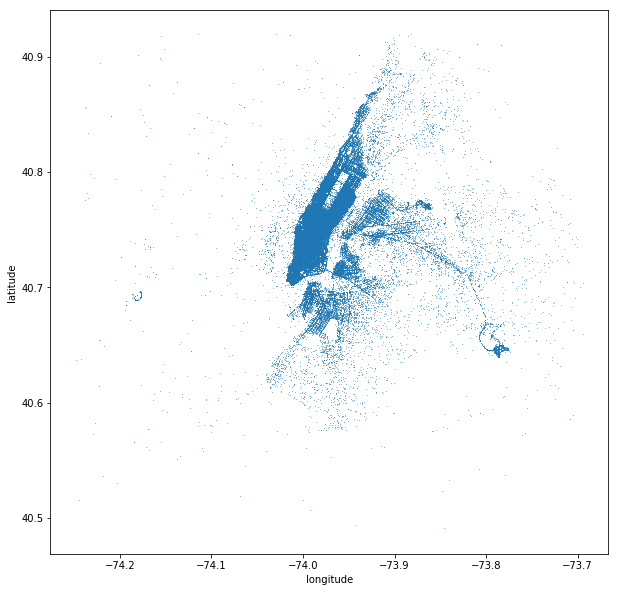

In [7]:
def remove_GPS_outliers (df):
    long_min = -74.26
    long_max = -73.69
    lat_min = 40.49
    lat_max = 40.92    
    df = df [ (df['pickup_latitude'] > lat_min) & (df['pickup_latitude'] < lat_max) ]
    df = df [ (df['dropoff_latitude'] > lat_min) & (df['dropoff_latitude'] < lat_max) ]
    df = df [ (df['pickup_longitude'] > long_min) & (df['pickup_longitude'] < long_max) ]
    df = df [ (df['dropoff_longitude'] > long_min) & (df['dropoff_longitude'] < long_max) ]
    return df

def show_GPS (df) :
    long = list(df['pickup_longitude']) + list(df['dropoff_longitude'])
    lat = list(df['pickup_latitude'])+ list(df['dropoff_latitude'])
    plt.figure(figsize = (10,10))
    plt.plot(long,lat,',', alpha = 0.5, markersize = 0.5)
    plt.xlabel('longitude')
    plt.ylabel('latitude')    
    plt.show()
    
check_total_samples(df)
df = remove_GPS_outliers(df)
check_total_samples(df)
show_GPS(df)

### 2-3. Remove fare outliers

Note that minimum value of fare_amount shouldn't be less than \\$2.5 according to [taxi information for yellow cab](http://www.nyc.gov/html/tlc/downloads/pdf/taxi_information.pdf) from New York city government.
On the other hand, we limit the maximum value of fare_amount to 150 (too expansive fare is abnormal)

In [8]:
def remove_fare_outliers (df):
    df = df [ (df['fare_amount'] > 2.5) & (df['fare_amount'] < 300) ]
    return df

df = remove_fare_outliers(df)
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,194874.000000,194874.000000,194874.000000,194874.000000,194874.000000,194874.000000
mean,11.315164,-73.975587,40.750919,-73.974474,40.751276,1.683621
std,9.462376,0.034129,0.026725,0.034037,0.030726,1.307405
min,2.510000,-74.248263,40.492546,-74.244448,40.490235,0.000000
25%,6.000000,-73.992270,40.736662,-73.991477,40.735672,1.000000
50%,8.500000,-73.982062,40.753523,-73.980528,40.753946,1.000000
75%,12.500000,-73.968390,40.767512,-73.965297,40.768362,2.000000
max,255.000000,-73.702795,40.918290,-73.694137,40.918868,6.000000


In [9]:
check_total_samples(df)

Total number of samples =  194874


## 3. Transform data

In [10]:
def transform_pickup_datetime(df):
    df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
    df['pickup_year'] = df['pickup_datetime'].dt.year
    df['pickup_month'] = df['pickup_datetime'].dt.month
    df['pickup_weekday'] = df['pickup_datetime'].dt.weekday
    df['pickup_hour'] = df['pickup_datetime'].dt.hour
    return df

df = transform_pickup_datetime(df)
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,0,17
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,1,16
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,3,0
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,5,4
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,1,7


## 4. Explore Data and Feature Selection

In [11]:
def show_corr(df):
    plt.figure(figsize=(12,8))
    cols = df.columns.values
    corr = np.corrcoef(df[cols].values.T)
    sns.heatmap(corr, annot=True,cmap="Blues", fmt='.2f', annot_kws={'size':10}, yticklabels=cols, xticklabels=cols)
    plt.show()

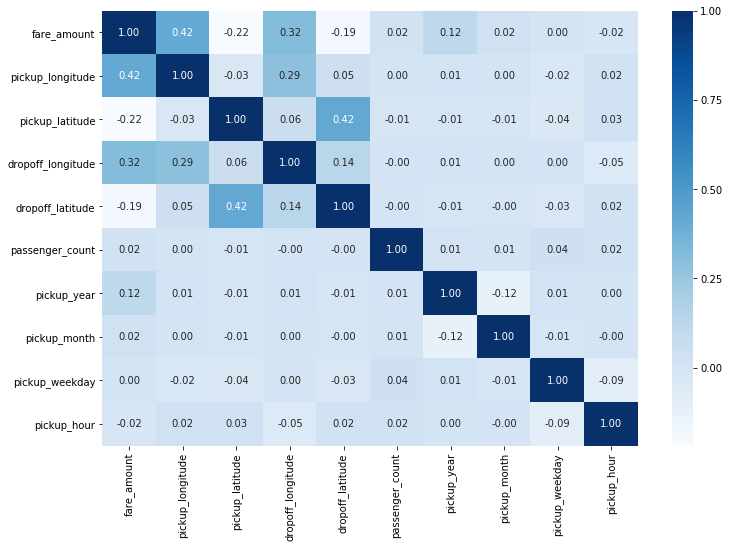

In [12]:
df.pop('key')
df.pop('pickup_datetime')
show_corr(df)

Here are selected features having significant correlation (absolute correlation value > 0.15) with target 'fare_amount' :
- pickup_longitude
- pickup_latitude
- dropoff_longitude
- dropoff_latitude

Other insignificant features are removed.

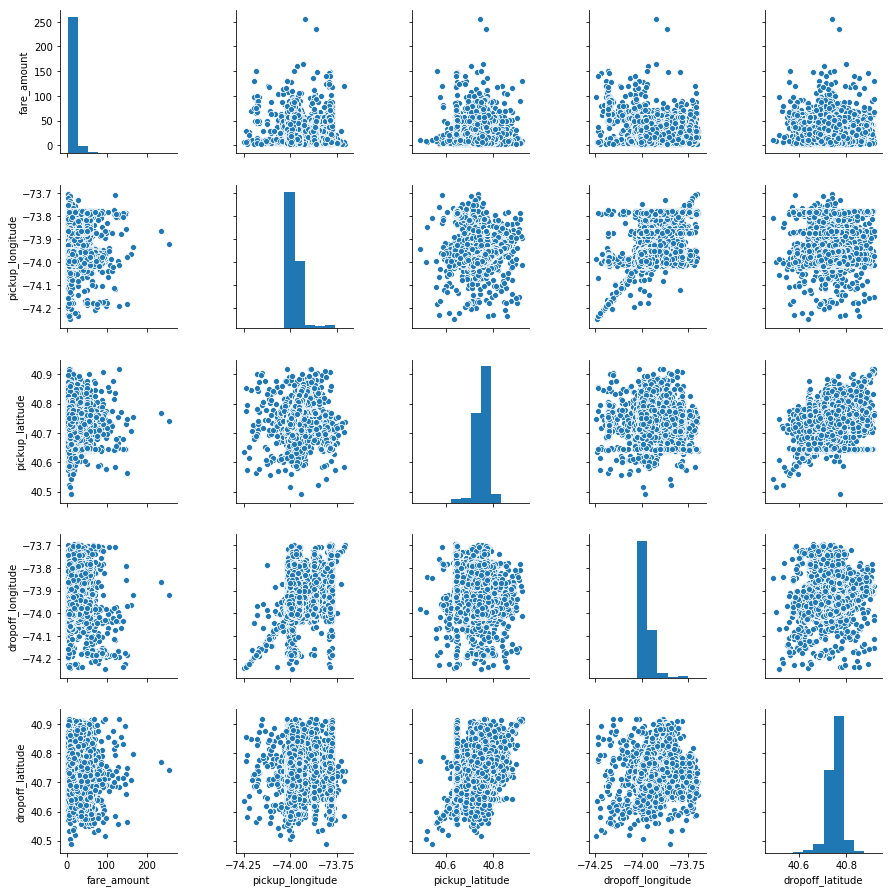

In [13]:
df.pop('passenger_count')
df.pop('pickup_year')
df.pop('pickup_month')
df.pop('pickup_weekday')
df.pop('pickup_hour')
show_pairplot(df)

## 5. Feature extraction

Intuitively, taxi fare should have some relationships with travel distance between pickup location (longitude/latitude) and dropoff location (longitude/latitude). We add two typical distance metrics between pickup location and dropoff location : [Manhattan distance](https://en.wikipedia.org/wiki/Taxicab_geometry) and [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance).

In [14]:
def add_GPS_dist(df):
    df['dist_longitude'] = (df['dropoff_longitude'] - df['pickup_longitude']).abs()
    df['dist_latitude'] = (df['dropoff_latitude'] - df['pickup_latitude']).abs()
    df['dist_Manhattan']  = df['dist_longitude'] + df['dist_latitude']
    df['dist_Euclidean'] = np.sqrt(df['dist_longitude']**2 + df['dist_latitude']**2)

add_GPS_dist(df)
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,dist_longitude,dist_latitude,dist_Manhattan,dist_Euclidean
count,194874.000000,194874.000000,194874.000000,194874.000000,194874.000000,194874.000000,194874.000000,194874.000000,194874.000000
mean,11.315164,-73.975587,40.750919,-73.974474,40.751276,0.022738,0.021199,0.043937,0.033976
std,9.462376,0.034129,0.026725,0.034037,0.030726,0.033587,0.022657,0.049622,0.038125
min,2.510000,-74.248263,40.492546,-74.244448,40.490235,0.000000,0.000000,0.000000,0.000000
25%,6.000000,-73.992270,40.736662,-73.991477,40.735672,0.006173,0.006996,0.016491,0.012891
50%,8.500000,-73.982062,40.753523,-73.980528,40.753946,0.012763,0.014203,0.028219,0.021888
75%,12.500000,-73.968390,40.767512,-73.965297,40.768362,0.024029,0.027137,0.050772,0.038719
max,255.000000,-73.702795,40.918290,-73.694137,40.918868,0.448875,0.281437,0.679899,0.497638


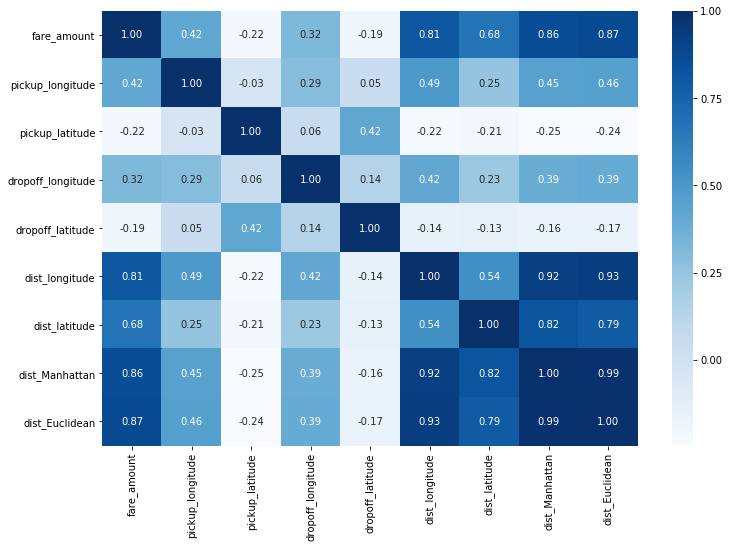

In [15]:
show_corr(df)

**After extracting distance of longitude, distance of longitude latitude, distance of Manhattan, distance of Euclidean, 
we have four additional features that highly correled (absolute value > 0.6) with target 'fare_amount' :**
- dist_longitude
- dist_latitude
- dist_Manhattan
- dist_Euclidean

## 6. Data Standardize

Several machine algorithms performs better when data standardized. I apply StandardScaler in sklearn to standardize features (not including the target, 'fare_amound').

In [16]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler() # default=(0, 1)
from sklearn.preprocessing import StandardScaler
def data_standardize(df):
    scaler = StandardScaler() 
    cols = df.columns[1:]
    df_standardized=pd.DataFrame(data = df)
    df_standardized[cols] = scaler.fit_transform(df[cols])
    return df_standardized

df = data_standardize(df)
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,dist_longitude,dist_latitude,dist_Manhattan,dist_Euclidean
count,194874.000000,1.948740e+05,1.948740e+05,1.948740e+05,1.948740e+05,1.948740e+05,1.948740e+05,1.948740e+05,1.948740e+05
mean,11.315164,2.458006e-13,7.950499e-14,1.023217e-13,1.287564e-13,1.001966e-16,-2.480851e-16,-2.982563e-17,-5.432786e-17
std,9.462376,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,2.510000,-7.989544e+00,-9.667958e+00,-7.931708e+00,-8.495833e+00,-6.769875e-01,-9.356590e-01,-8.854411e-01,-8.911781e-01
25%,6.000000,-4.888206e-01,-5.334885e-01,-4.995354e-01,-5.078387e-01,-4.931953e-01,-6.268824e-01,-5.531079e-01,-5.530495e-01
50%,8.500000,-1.897211e-01,9.742612e-02,-1.778588e-01,8.689076e-02,-2.970025e-01,-3.087931e-01,-3.167605e-01,-3.170682e-01
75%,12.500000,2.108754e-01,6.208746e-01,2.696137e-01,5.560903e-01,3.843385e-02,2.620641e-01,1.377316e-01,1.244124e-01
max,255.000000,7.992942e+00,6.262773e+00,8.236178e+00,5.454460e+00,1.268762e+01,1.148589e+01,1.281616e+01,1.216175e+01


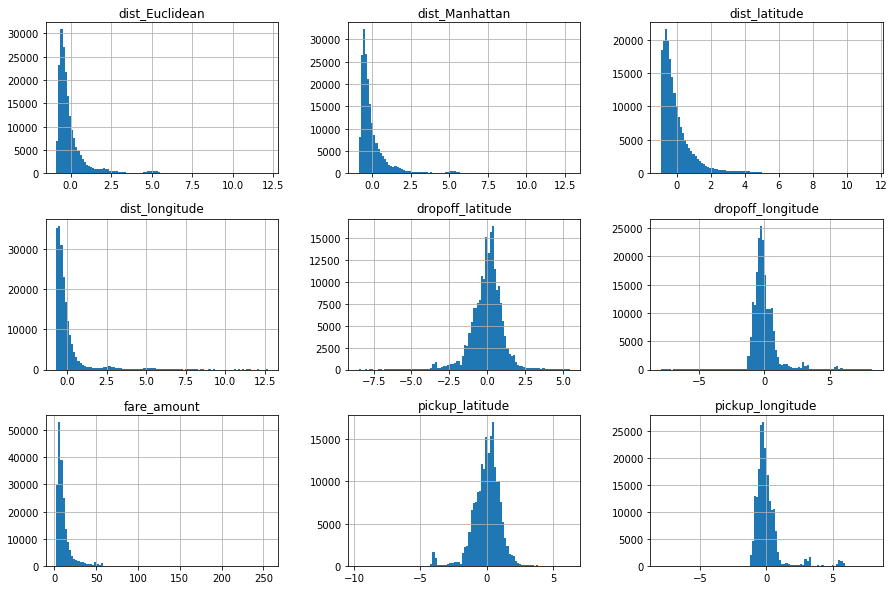

In [17]:
df.hist(bins=100, figsize=(15,10));

# PART B. Data Preprocess

## 0. Import necessary modules

In [18]:
import pandas as pd
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy
import seaborn as sns
%matplotlib inline

## 1. Load Data

Instead of using whole dataset, I use 50K samples (sample row from 0 to 50K) in "train.csv" file for training and validation (90% data for training, 10% data for validation). Also, I use 10K samples (sample row from 50K to 60K)  in "train.csv" for testing.

In [19]:
n_train_valid_samples = 50000 # 50K
n_test_samples = 10000  #10K

df_train_valid=pd.read_csv('all/train.csv', nrows = n_train_valid_samples)
df_train_valid.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,11.364171,-72.509756,39.933759,-72.504616,39.926251,1.667840
std,9.685557,10.393860,6.224857,10.407570,6.014737,1.289195
min,-5.000000,-75.423848,-74.006893,-84.654241,-74.006377,0.000000
25%,6.000000,-73.992062,40.734880,-73.991152,40.734371,1.000000
50%,8.500000,-73.981840,40.752678,-73.980082,40.753372,1.000000
75%,12.500000,-73.967148,40.767360,-73.963584,40.768167,2.000000
max,200.000000,40.783472,401.083332,40.851027,43.415190,6.000000


## 2. Preprocess and Split Data

In [20]:
def preprocess(df):
    df = remove_na(df)
    df = transform_pickup_datetime(df)
    df.pop('key')
    df.pop('pickup_datetime')    
    df = remove_GPS_outliers(df)
    df = remove_fare_outliers(df)
    add_GPS_dist(df)
    df.pop('passenger_count')
    df.pop('pickup_year')
    df.pop('pickup_month')
    df.pop('pickup_weekday')
    df.pop('pickup_hour')
    df = data_standardize(df)
    return df

In [21]:
df_train_valid = preprocess(df_train_valid)
df_train_valid.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,dist_longitude,dist_latitude,dist_Manhattan,dist_Euclidean
count,48694.000000,4.869400e+04,4.869400e+04,4.869400e+04,4.869400e+04,4.869400e+04,4.869400e+04,4.869400e+04,4.869400e+04
mean,11.340768,-1.506822e-13,-1.931195e-13,-1.221188e-13,6.217125e-14,5.107199e-17,-6.041087e-17,-1.208217e-16,3.896063e-17
std,9.381403,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00,1.000010e+00
min,2.900000,-7.986515e+00,-8.503057e+00,-7.862797e+00,-7.241180e+00,-6.770723e-01,-9.424285e-01,-8.867387e-01,-8.933448e-01
25%,6.000000,-4.890409e-01,-5.339814e-01,-4.972472e-01,-5.037757e-01,-4.939367e-01,-6.322343e-01,-5.536884e-01,-5.540190e-01
50%,8.500000,-1.908392e-01,9.384223e-02,-1.790887e-01,8.817515e-02,-2.967906e-01,-3.103988e-01,-3.201619e-01,-3.201445e-01
75%,12.500000,2.088434e-01,6.261311e-01,2.626755e-01,5.563444e-01,4.135584e-02,2.672539e-01,1.442631e-01,1.296508e-01
max,165.000000,7.991825e+00,6.225639e+00,8.030137e+00,5.236496e+00,1.105665e+01,1.058752e+01,8.081288e+00,9.552540e+00


In [22]:
from sklearn.model_selection import train_test_split
X, y = df_train_valid.iloc[:,1:].values, df_train_valid.iloc[:,0].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.1, random_state = 0)

print("Preprocessed training set has {} samples.".format(X_train.shape[0]))
print("Preprocessed validation set has {} samples.".format(X_valid.shape[0]))

Preprocessed training set has 43824 samples.
Preprocessed validation set has 4870 samples.


# PART C. Model Training and Selection

## 0. Define evaluation metric

In [23]:
from sklearn.metrics import r2_score

# Unit Test
y_true = [10.2, 20.3, 38.4, 10.8, 4.2]
y_predict = [9.9, 12.0, 45.1, 3.8, 5.3]
print("Unit Test of Evaluation Metric : r2_score")
print("y_true = ", y_true)
print("y_predict = ", y_predict)

print("R^2 : {}".format(r2_score(y_true, y_predict)))

Unit Test of Evaluation Metric : r2_score
y_true =  [10.2, 20.3, 38.4, 10.8, 4.2]
y_predict =  [9.9, 12.0, 45.1, 3.8, 5.3]
R^2 : 0.7711984471391438


## 1. Candidate Model Training

Multiple linear model is used as benchmark model and the other three models with hyperparameter grid-searching are experimented.
The experiment models are :
- Polynomial Regression
- Random Forest Regression
- Multiple Layer Perceptron (MLP) Regression

### Model 1 : Multiple Linear Regression (benchmark model)

In [24]:
from sklearn.linear_model import LinearRegression
def Linear_reg(X_train, X_valid, y_train, y_valid):    
    est_linear = LinearRegression()
    est_linear.fit(X_train, y_train)
    
    y_train_predict = est_linear.predict(X_train)
    r2_train = r2_score(y_train, y_train_predict)

    y_valid_predict = est_linear.predict(X_valid)
    r2_valid = r2_score(y_valid, y_valid_predict)

    return r2_train, r2_valid, est_linear

r2_train, r2_valid, est_linear = Linear_reg(X_train, X_valid, y_train, y_valid)
print("R^2 (train) : ", r2_train)
print("R^2 (valid) : ", r2_valid)

R^2 (train) :  0.7729741316254147
R^2 (valid) :  0.809754753525481


### Model 2 : Polynomial Regression

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

def Poly_reg(X_train, X_valid, y_train, y_valid, Poly_para={'degree' : 2}):
    poly = PolynomialFeatures(degree=Poly_para['degree'])
    X_train_ = poly.fit_transform(X_train)
    est_poly = LinearRegression()    
    est_poly.fit(X_train_,y_train) 

    y_train_predict = est_poly.predict(X_train_)
    r2_train = r2_score(y_train, y_train_predict)
    
    X_valid_ = poly.fit_transform(X_valid)

    y_valid_predict = est_poly.predict(X_valid_)
    r2_valid = r2_score(y_valid, y_valid_predict)

    return r2_train, r2_valid

for deg in range(1,5):
    Poly_para={'degree' : deg}
    r2_train, r2_valid = Poly_reg(X_train, X_valid, y_train, y_valid, Poly_para)
    print("Polynomial degree", deg)
    print("R^2 (train) : ", r2_train)
    print("R^2 (valid) : ", r2_valid)


Polynomial degree 1
R^2 (train) :  0.7729843036205323
R^2 (valid) :  0.8098699723098052
Polynomial degree 2
R^2 (train) :  0.7922608093755379
R^2 (valid) :  0.8272034943361776
Polynomial degree 3
R^2 (train) :  0.8021432880961903
R^2 (valid) :  0.8338251696982749
Polynomial degree 4
R^2 (train) :  0.8112781920025682
R^2 (valid) :  0.8025435308497839


We can found polynomial degree = 3 is the best model among polynomial regression models because it has high training R^2 value and validation R^2 is also the peak value before reverting.

### Model 3 : Random Forest Regression 

In [28]:
from sklearn.ensemble import RandomForestRegressor
def RF_reg(X_train, X_valid, y_train, y_valid, RF_para={'n_estimators': 50}):
    est_rf = RandomForestRegressor(n_estimators=RF_para['n_estimators'], random_state=1)
    est_rf.fit(X_train,y_train)

    y_train_predict = est_rf.predict(X_train)
    r2_train = r2_score(y_train, y_train_predict)

    y_valid_predict = est_rf.predict(X_valid)
    r2_valid = r2_score(y_valid, y_valid_predict)

    return r2_train, r2_valid, est_rf


for n in range(50,250,50):
    RF_para = {'n_estimators': n}
    r2_train, r2_valid, est_rf = RF_reg(X_train, X_valid, y_train, y_valid, RF_para)
    print("Random Forest number of estimators : ", n)
    print("R^2 (train) : ", r2_train)
    print("R^2 (valid) : ", r2_valid)

Random Forest number of estimators :  50
R^2 (train) :  0.9733243999496467
R^2 (valid) :  0.8533891018408051
Random Forest number of estimators :  100
R^2 (train) :  0.9744579157443554
R^2 (valid) :  0.8541811948795832
Random Forest number of estimators :  150
R^2 (train) :  0.9747864419162937
R^2 (valid) :  0.8541748899779061
Random Forest number of estimators :  200
R^2 (train) :  0.9750437379662068
R^2 (valid) :  0.8540403418177958


We choose number of estimators = 100 as the best model among random forest regression models because it has high training R^2 value and validation R^2 saturates.

### Model 4 : Multiple Layer Perceptron Regression 

In [29]:
from sklearn.neural_network import MLPRegressor
def MLP_reg(X_train, X_valid, y_train, y_valid, MLP_para={'hidden_layer_sizes' : (10, 10, 10) , 'random_state' : 1, 'alpha' : 1e-6, 'solver' : 'lbfgs'} ):
    est_mlp= MLPRegressor(solver=MLP_para['solver'], alpha=MLP_para['alpha'], hidden_layer_sizes=MLP_para['hidden_layer_sizes'], random_state=MLP_para['random_state'])
    est_mlp.fit(X_train, y_train)   
#    est_mlp.score(X_train, y_train)

    y_train_predict = est_mlp.predict(X_train)
    r2_train = r2_score(y_train, y_train_predict)
    
    y_valid_predict = est_mlp.predict(X_valid)
    r2_valid = r2_score(y_valid, y_valid_predict)
    return r2_train, r2_valid, est_mlp

for num_node in range(10, 50, 10): 
    MLP_para = {'hidden_layer_sizes' : (num_node, num_node, num_node) , 'random_state' : 1, 'alpha' : 1e-6, 'solver' : 'lbfgs'}  #solver : lbfgs, adam, ...
    r2_train, r2_valid, est_mlp = MLP_reg(X_train, X_valid, y_train, y_valid, MLP_para)
    print("MLP hidden layer =3, number of hidden nodes = ", num_node)
    print("R^2 (train) : ", r2_train)
    print("R^2 (valid) : ", r2_valid)

MLP hidden layer =3, number of hidden nodes =  10
R^2 (train) :  0.8158648517376604
R^2 (valid) :  0.8479220681658175
MLP hidden layer =3, number of hidden nodes =  20
R^2 (train) :  0.8246558228373615
R^2 (valid) :  0.850849950748826
MLP hidden layer =3, number of hidden nodes =  30
R^2 (train) :  0.8257800335298277
R^2 (valid) :  0.8500624174084247
MLP hidden layer =3, number of hidden nodes =  40
R^2 (train) :  0.8237470179256542
R^2 (valid) :  0.8448035054943113


We can found number of hidden nodes = 20 is the best model because it has high training R^2 value and validation R^2 is also the peak value before reverting. 

Among all models, random forest regression model with number of estimators = 30 has highest training R^2 = 0.974 and validation R^2 = 0.854. Thus, it seems to be our best model candidate. On the other hand, the benchmark Multiple Linear Regression model has R^2(train) = 0.773 and R^(valid) = 0.810. 

## 2. Sensitivity Analysis

To justify the sensitivity of best model and benchmark model, I used data of sample rows range from 100K to 130K in 'train.csv' file to test model sensitivity. Three sensitivity batch data with 10K samples are used.

In [30]:
n_sensitivity_samples = 10000 #10K

df_sensitivity1 =pd.read_csv('all/train.csv', nrows = n_sensitivity_samples, skiprows=list(range(1, 100002)) )
df_sensitivity2 =pd.read_csv('all/train.csv', nrows = n_sensitivity_samples, skiprows=list(range(1, 100002+n_sensitivity_samples)) )
df_sensitivity3 =pd.read_csv('all/train.csv', nrows = n_sensitivity_samples, skiprows=list(range(1, 100002+2*n_sensitivity_samples)) )

df_sensitivity1 = preprocess(df_sensitivity1)
df_sensitivity2 = preprocess(df_sensitivity2)
df_sensitivity3 = preprocess(df_sensitivity3)
X1, y1 = df_sensitivity1.iloc[:,1:].values, df_sensitivity1.iloc[:,0].values
X2, y2 = df_sensitivity2.iloc[:,1:].values, df_sensitivity2.iloc[:,0].values
X3, y3 = df_sensitivity3.iloc[:,1:].values, df_sensitivity3.iloc[:,0].values
X_sensitivity = [X1, X2, X3]
y_sensitivity = [y1, y2, y3]

/Users/RAYMOND/miniconda3/envs/ml-capstone/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/RAYMOND/miniconda3/envs/ml-capstone/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/RAYMOND/miniconda3/envs/ml-capstone/lib/python3.5/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using

In [31]:
r2_train_benchmark, r2_valid_benchmark, est_benchmark = Linear_reg(X_train, X_valid, y_train, y_valid)    
print('Sensitivity of benchmark model (linear regression model) : ')
r2_benchmark=[]
for X, y in zip(X_sensitivity, y_sensitivity):
    y_predict = est_linear.predict (X)
    r2 = r2_score(y, y_predict)
    r2_benchmark.append(r2)
    print('R^2 :', r2)
print('Average R^2 :', sum(r2_benchmark) / float(len(r2_benchmark)))


r2_train_best, r2_valid_best, est_best = RF_reg(X_train, X_valid, y_train, y_valid, RF_para = {'n_estimators': 30})
print('Sensitivity of best model (random forest regression model) : ')  

r2_best=[]
for X, y in zip(X_sensitivity, y_sensitivity):
    y_predict = est_best.predict (X)
    r2 = r2_score(y, y_predict)
    r2_best.append(r2)    
    print('R^2 :', r2)
print('Average R^2 :', sum(r2_best) / float(len(r2_best)) )        

Sensitivity of benchmark model (linear regression model) : 
R^2 : -3.082568191050259e+20
R^2 : -1.2677135170730803e+20
R^2 : -5.474876256878982e+20
Average R^2 : -3.2750526550007736e+20
Sensitivity of best model (random forest regression model) : 
R^2 : 0.83434451537281
R^2 : 0.7276965321528759
R^2 : 0.8062664829977666
Average R^2 : 0.7894358435078175


We can find the benchmark model (multiple linear regression model) is very sensitive to data, compared with R^2 for valid dataset 0.810, the average R^2 for sensitivity batches is -3.2750526550007736e+20. It has very large variation. On the other hand, our best model (random forest regression model) is not that sensitive to data, the R^2 for valid data is 0.854, and average R^2 for sensitivity batches is 0.789. It's comparable and has similar performance among different dataset.

# PART D. Model Evaluation

## 1. Load Data

In [32]:
df_test=pd.read_csv('all/train.csv', nrows = n_test_samples, skiprows=list(range(1, n_train_valid_samples)) )
df_test.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.160682,-72.571975,39.952387,-72.607937,39.977419,1.683300
std,9.501261,10.208912,6.011664,10.078934,5.934254,1.322413
min,-44.900000,-74.718822,-73.983715,-74.718822,-73.989357,0.000000
25%,6.000000,-73.992041,40.735733,-73.991301,40.734766,1.000000
50%,8.500000,-73.981863,40.752918,-73.980158,40.753690,1.000000
75%,12.500000,-73.967923,40.767247,-73.963460,40.768415,2.000000
max,149.000000,40.766100,41.366138,40.757492,41.366138,6.000000


## 2. Preprocess Data

In [33]:
df_test = preprocess(df_test)
X_test, y_test = df_test.iloc[:,1:].values, df_test.iloc[:,0].values
print("Preprocessed testing set has {} samples.".format(X_test.shape[0]))

Preprocessed testing set has 9754 samples.


## Model evaluation

In [34]:
X_test, y_test = df.iloc[:,1:].values, df.iloc[:,0].values

y_test_predict_benchmark= est_benchmark.predict(X_test)
y_test_predict_best = est_best.predict(X_test)

r2_test_benchmark = r2_score(y_test, y_test_predict_benchmark)
r2_test_best = r2_score(y_test, y_test_predict_best)

print("R^2 (test) of Linear Regression : ", r2_test_benchmark)
print("R^2 (test) of Random Forest Regression : ", r2_valid)

R^2 (test) of Linear Regression :  -3.5642511557435007e+19
R^2 (test) of Random Forest Regression :  0.8448035054943113


In [35]:
def show_series(y_true, y_predict):
    plt.figure(figsize=(8,4))
    sns.kdeplot(y_true,label='y_true')
    sns.kdeplot(y_predict,label='y_predict')

/Users/RAYMOND/miniconda3/envs/ml-capstone/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


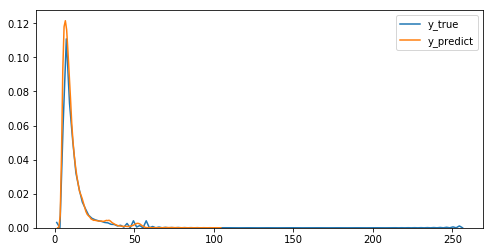

In [36]:
show_series(y_test, y_test_predict_best)

We can see R^2 (test) of Random Forest Regression = 0.8448035054943113, which is comparable to R^2 in train and valid data. 
It performs pretty good as expected. On the other hand, the benchmark model (linear model) is terrible because R^2 = -3.5642511557435007e+19 < 0. Predicting average value of taxi fare would even have better R^2 than the benchmark model.